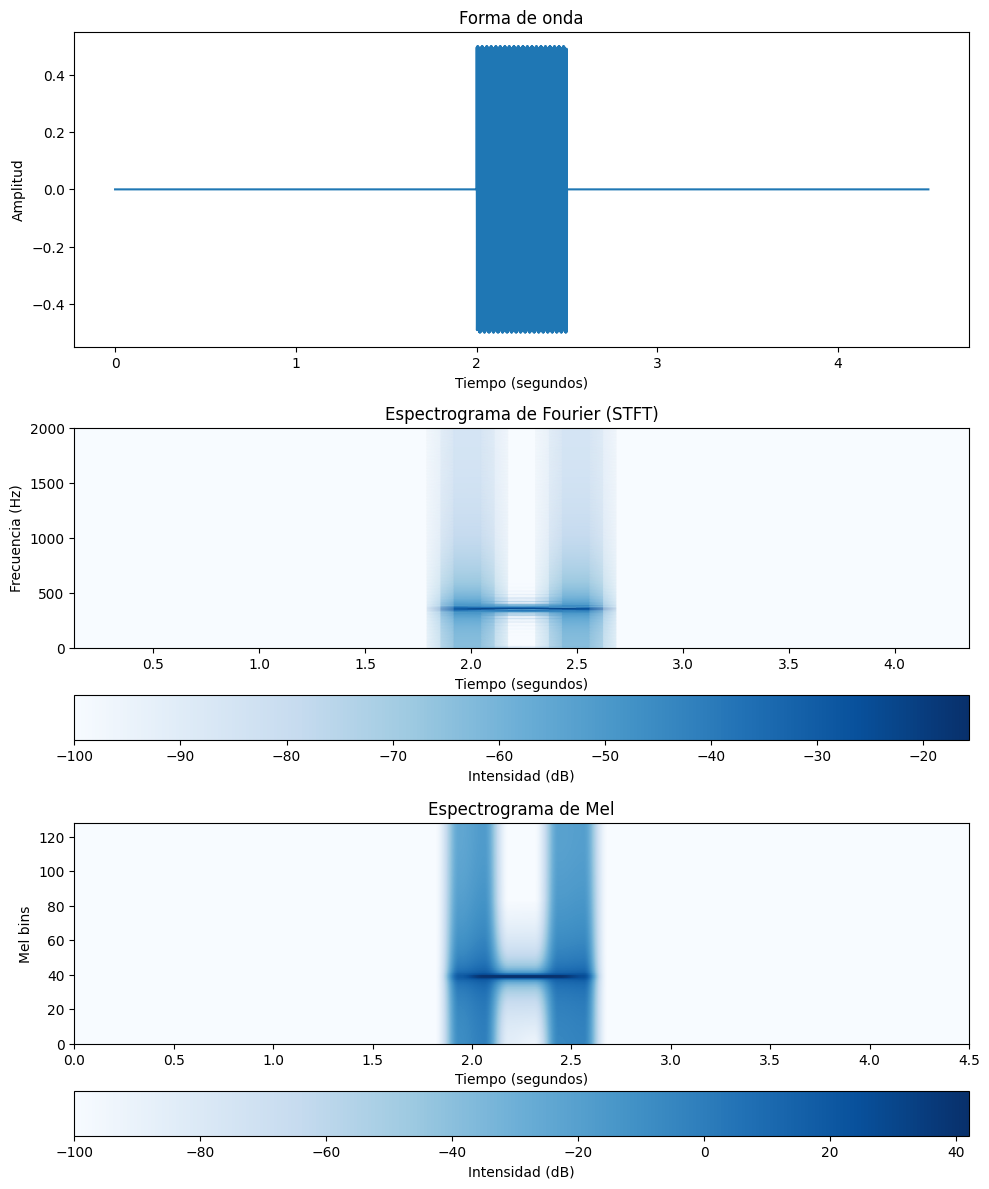

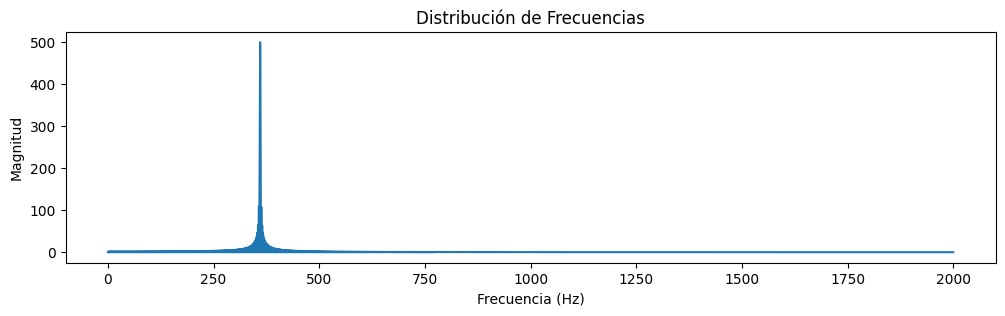

In [1]:
import torch
import numpy as np
from IPython.display import Audio
from helpers.plot import plot_waveform_and_spectrograms, plot_audio_fft
from helpers.trigger import generate_synthetic_wave, save_wave_to_wav

FREQUENCY = 360
SAMPLE_RATE = 4000

FIRST_PRE_SILENCE_SECS = 2
FIRST_SOUND_DURATION = 0.5
FIRST_POST_SILENCE_SECS = 2

wave, sample_rate = generate_synthetic_wave(
    frequency=FREQUENCY,
    secs_duration=FIRST_SOUND_DURATION,
    sample_rate=SAMPLE_RATE,
    pre_silence_duration=FIRST_PRE_SILENCE_SECS,
    post_silence_duration=FIRST_POST_SILENCE_SECS,
)

plot_waveform_and_spectrograms(torch.Tensor(wave), sample_rate)
plot_audio_fft(wave, sample_rate)

Audio(wave, rate=sample_rate, autoplay=True)

In [2]:
SECOND_PRE_SILENCE_SECS = 1
SECOND_SOUND_DURATION = 0.5
SECOND_POST_SILENCE_SECS = 150

second_wave, _ = generate_synthetic_wave(
    frequency=FREQUENCY,
    secs_duration=SECOND_SOUND_DURATION,
    sample_rate=SAMPLE_RATE,
    pre_silence_duration=SECOND_PRE_SILENCE_SECS,
    post_silence_duration=SECOND_POST_SILENCE_SECS,
)

combined_wave = np.concatenate([wave, second_wave])

wave.shape, second_wave.shape, combined_wave.shape

((18000,), (606000,), (624000,))

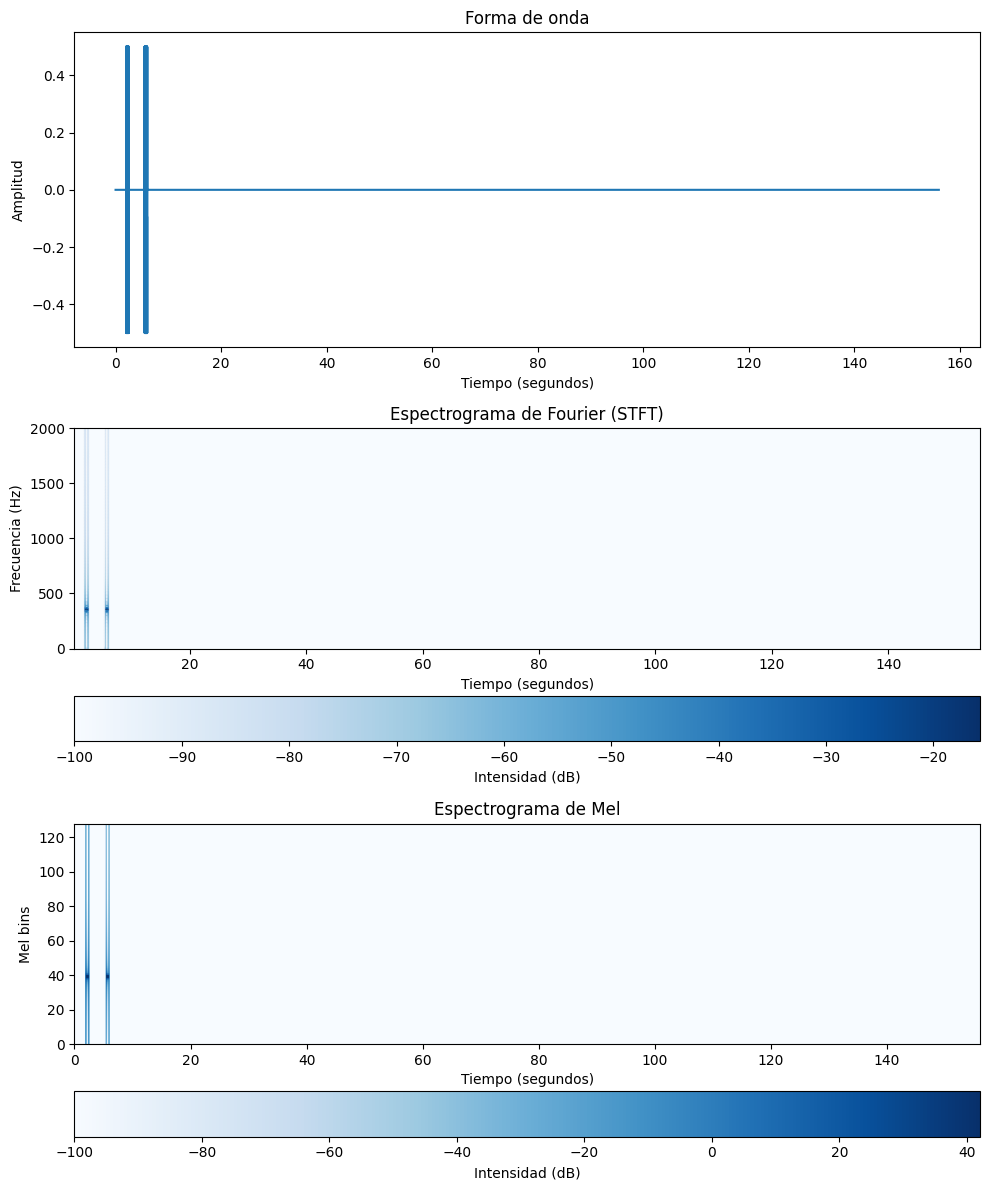

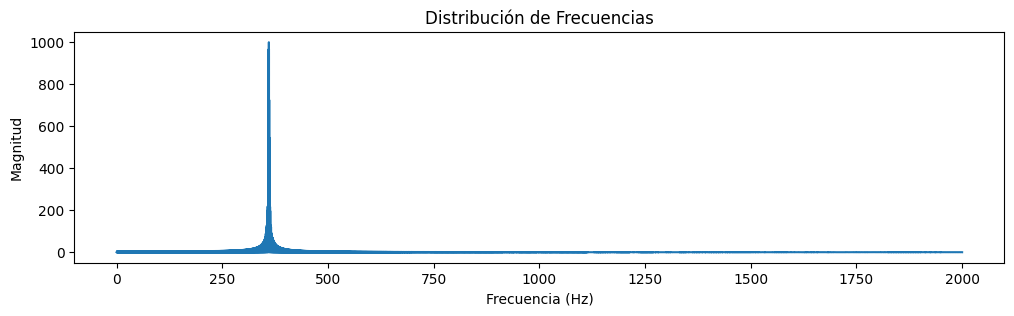

In [4]:
plot_waveform_and_spectrograms(torch.Tensor(combined_wave), sample_rate)
plot_audio_fft(combined_wave, sample_rate)

Audio(combined_wave, rate=sample_rate, autoplay=True)

In [5]:
VOLUMEN = 0.01

FILENAME = "trigger-"
FILENAME += f"freq{FREQUENCY}-"
FILENAME += f"first-pre{FIRST_PRE_SILENCE_SECS:0.0f}-"
FILENAME += f"sound{FIRST_SOUND_DURATION:0.1f}-"
FILENAME += f"pos{FIRST_POST_SILENCE_SECS:0.0f}-"
FILENAME += f"second-pre{SECOND_PRE_SILENCE_SECS:0.0f}-"
FILENAME += f"sound{SECOND_SOUND_DURATION:0.1f}-"
FILENAME += f"pos{SECOND_POST_SILENCE_SECS:0.0f}-"
FILENAME += f"vol{VOLUMEN:0.2f}"

save_wave_to_wav(combined_wave, sample_rate, FILENAME, VOLUMEN)

File 'trigger-freq360-first-pre2-sound0.5-pos2-second-pre1-sound0.5-pos150-vol0.01.wav' was saved succesfully!
